In [1]:
import pandas as pd
import os
import json
from datetime import datetime,timedelta
from tqdm import tqdm
import numpy as np
import itertools
import meteostat
from API.utils import get_postgres_engine
import sys
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append('API')
from API.transform_historical_data import get_weather_data

plt.rcParams['figure.figsize'] = 16, 9
plt.rcParams['font.size'] = 17

In [2]:
engine = get_postgres_engine('API/postgres_credentials.ini')

In [3]:
city = 'Bonn'

In [4]:
df_city = pd.read_sql(f"SELECT *, (timestamp_end - INTERVAL '150 SECONDS') as timestamp"
                      f" FROM intervals_usage WHERE city_name = '{city}'", con=engine)

In [8]:
weather_city = pd.read_sql(f"SELECT * FROM weather_data WHERE city_name = '{city}'", con=engine)

In [9]:
df_city

,timestamp_start,timestamp_end,placeguid,country_name,city_uid,city_name,lat,lng,returned,collected,timestamp
0,2019-05-23 20:27:30,2019-05-23 20:32:30,8886,Germany,547,Bonn,50.736857,7.105968,0,1,2019-05-23 20:30:00
1,2019-05-23 20:27:30,2019-05-23 20:32:30,8940,Germany,547,Bonn,50.757836,7.147217,0,1,2019-05-23 20:30:00
2,2019-05-23 20:27:30,2019-05-23 20:32:30,8941,Germany,547,Bonn,50.668987,7.196071,0,1,2019-05-23 20:30:00
3,2019-05-23 20:27:30,2019-05-23 20:32:30,8944,Germany,547,Bonn,50.708129,7.168317,0,1,2019-05-23 20:30:00
4,2019-05-23 20:27:30,2019-05-23 20:32:30,8954,Germany,547,Bonn,50.744498,7.081358,0,1,2019-05-23 20:30:00
...,...,...,...,...,...,...,...,...,...,...,...
2483426,2019-10-17 11:02:30,2019-10-17 11:07:30,5414171,Germany,547,Bonn,50.706600,7.144273,1,0,2019-10-17 11:05:00
2483427,2019-10-17 11:02:30,2019-10-17 11:07:30,5414172,Germany,547,Bonn,50.727271,7.106258,1,0,2019-10-17 11:05:00
2483428,2019-10-17 11:02:30,2019-10-17 11:07:30,5414173,Germany,547,Bonn,50.716618,7.127512,1,0,2019-10-17 11:05:00
2483429,2019-10-17 11:02:30,2019-10-17 11:07:30,5414174,Germany,547,Bonn,50.760676,7.057847,1,0,2019-10-17 11:05:00


In [10]:
weather_city

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,city_name,city_uid
0,2019-05-23 21:00:00,13.7,7.0,64.0,0.0,NaN,60.0,6.0,10.0,1017.0,0.0,4.0,Bonn,547.0
1,2019-05-23 22:00:00,11.7,7.4,75.0,0.0,NaN,150.0,11.0,12.0,1017.1,0.0,4.0,Bonn,547.0
2,2019-05-23 23:00:00,12.3,6.8,69.0,0.0,NaN,90.0,7.0,10.0,1016.8,0.0,4.0,Bonn,547.0
3,2019-05-24 00:00:00,10.6,6.9,78.0,0.0,0.0,130.0,10.0,12.0,1016.6,0.0,4.0,Bonn,547.0
4,2019-05-24 01:00:00,10.5,6.1,74.0,0.0,NaN,140.0,10.0,13.0,1016.2,0.0,4.0,Bonn,547.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3514,2019-10-17 07:00:00,13.4,11.8,90.0,0.1,0.0,220.0,26.0,40.0,1010.0,0.0,8.0,Bonn,547.0
3515,2019-10-17 08:00:00,12.1,11.3,95.0,0.1,0.0,250.0,25.0,44.0,1011.0,0.0,8.0,Bonn,547.0
3516,2019-10-17 09:00:00,12.7,10.8,88.0,0.0,0.0,230.0,18.0,36.0,1011.5,0.0,8.0,Bonn,547.0
3517,2019-10-17 10:00:00,13.7,11.0,84.0,0.0,0.0,230.0,16.0,28.0,1011.6,19.0,4.0,Bonn,547.0


In [11]:
city2 = 'Pittsburgh'
df2 = pd.read_sql(f"SELECT *, (timestamp_end - INTERVAL '150 SECONDS') as timestamp"
                  f" FROM intervals_usage WHERE city_name = '{city2}'", con=engine)
weather_df2 = pd.read_sql(f"SELECT * FROM weather_data WHERE city_name = '{city2}'", con=engine)

In [12]:
def weather_factor_impact(weather_city_df, city_df, col):
    factor_mean = weather_city_df[col].mean()
    factor_day_mean = weather_city_df.groupby(weather_city_df.time.dt.date).agg({col: 'mean'})
    heavy_days = factor_day_mean.loc[factor_day_mean[col]>factor_mean].index
    heavy_data = city_df.loc[city_df.timestamp.dt.date.isin(heavy_days)]
    light_data = city_df.loc[~city_df.timestamp.dt.date.isin(heavy_days)]
    heavy_data_avg = heavy_data.groupby(heavy_data.timestamp.dt.date).agg({'collected': 'sum'})
    light_data_avg = light_data.groupby(light_data.timestamp.dt.date).agg({'collected': 'sum'})
    return heavy_data_avg, light_data_avg

In [13]:
day_stats = df_city.groupby(df_city['timestamp'].dt.date).agg({'collected': 'sum'}).merge(weather_city.groupby(weather_city.time.dt.date).agg({'prcp': 'mean'}),
                                                                              left_index=True, right_index=True).reset_index()


In [14]:
rainy_data_avg, sunny_data_avg = weather_factor_impact(weather_city, df_city, 'prcp')
rainy_data_avg['Weather'] = 'Rainy'
sunny_data_avg['Weather'] = 'Not rainy'

In [15]:
rainy_data_avg_city2, sunny_data_avg_city2 = weather_factor_impact(weather_df2, df2, 'prcp')
rainy_data_avg_city2['Weather'] = 'Rainy'
sunny_data_avg_city2['Weather'] = 'Not rainy'

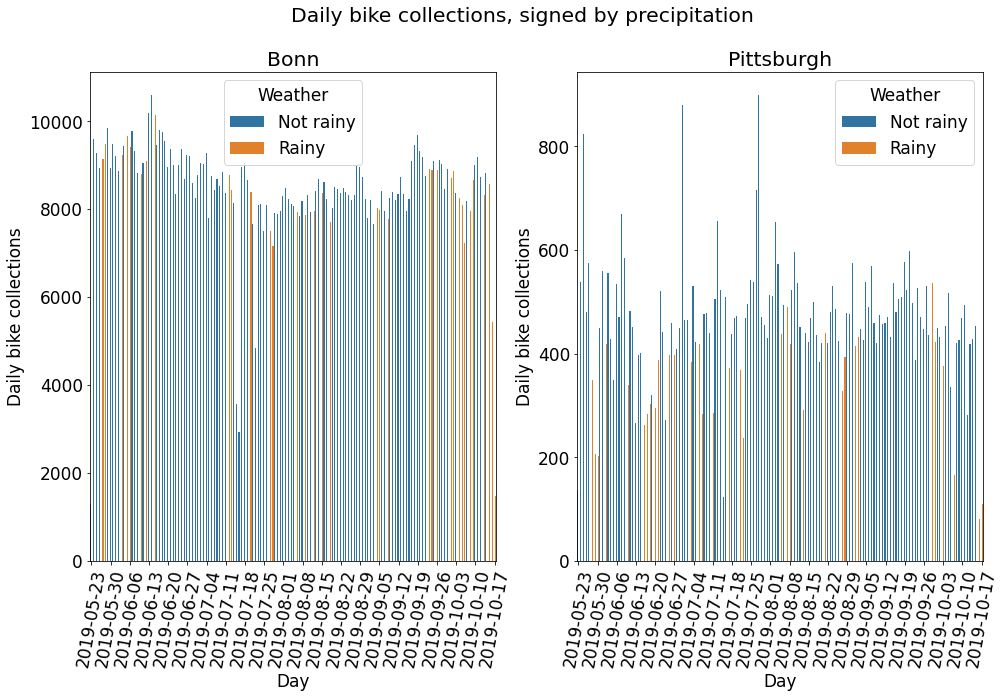

In [16]:
weather_comp_data = pd.concat((rainy_data_avg, sunny_data_avg)).reset_index().sort_values('timestamp')
weather_comp_data_city2 = pd.concat((rainy_data_avg_city2, sunny_data_avg_city2)).reset_index().sort_values('timestamp')

fig, ax = plt.subplots(1, 2)
sns.barplot(x='timestamp', y='collected', hue='Weather', data = weather_comp_data, ax = ax[0])
sns.barplot(x='timestamp', y='collected', hue='Weather', data = weather_comp_data_city2, ax = ax[1])
ax[0].set_ylabel('Daily bike collections')
ax[0].set_xlabel('Day')
ax[0].set_xticks(np.arange(len(weather_comp_data['timestamp']), step=7))
ax[0].set_title(f'{city}')
plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=80)
ax[1].set_ylabel('Daily bike collections')
ax[1].set_xlabel('Day')
ax[1].set_xticks(np.arange(len(weather_comp_data_city2['timestamp']), step=7))
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=80)
ax[1].set_title(f'{city2}')
plt.suptitle('Daily bike collections, signed by precipitation')
plt.show()

In [17]:
windy_data_avg, calm_data_avg = weather_factor_impact(weather_city, df_city, 'wspd')
windy_data_avg['Weather'] = 'Windy'
calm_data_avg['Weather'] = 'Calm'

In [18]:
windy_data_avg_2, calm_data_avg_2 = weather_factor_impact(weather_df2, df2, 'wspd')
windy_data_avg_2['Weather'] = 'Windy'
calm_data_avg_2['Weather'] = 'Calm'

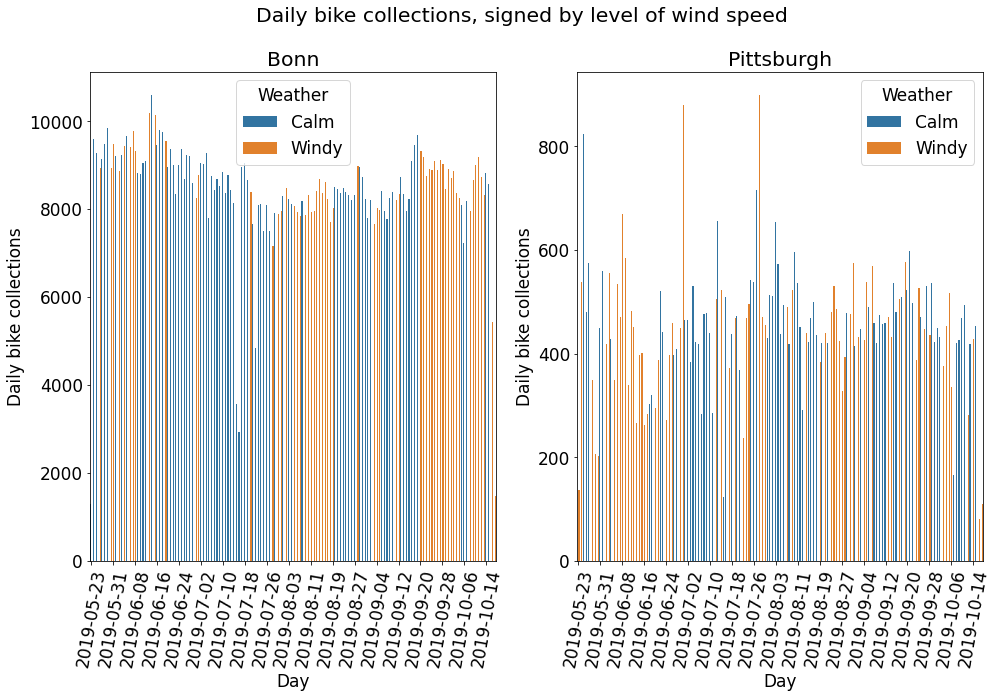

In [19]:
wind_comp_data = pd.concat((windy_data_avg, calm_data_avg)).reset_index().sort_values('timestamp')
wind_comp_data_2 = pd.concat((windy_data_avg_2, calm_data_avg_2)).reset_index().sort_values('timestamp')

fig, ax = plt.subplots(1, 2)
sns.barplot(x='timestamp', y='collected', hue='Weather', data = wind_comp_data, ax=ax[0], hue_order=['Calm', 'Windy'])
sns.barplot(x='timestamp', y='collected', hue='Weather', data = wind_comp_data_2, ax=ax[1], hue_order=['Calm', 'Windy'])
ax[0].set_ylabel('Daily bike collections')
ax[0].set_xlabel('Day')
ax[0].set_xticks(np.arange(len(weather_comp_data['timestamp']), step=8))
ax[0].set_title(city)
plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=80)
ax[1].set_ylabel('Daily bike collections')
ax[1].set_xlabel('Day')
ax[1].set_xticks(np.arange(len(weather_comp_data['timestamp']), step=8))
ax[1].set_title(city2)
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=80)
plt.suptitle(f'Daily bike collections, signed by level of wind speed')
plt.show()

In [20]:
def get_week_analysis(start_date, end_date, df, weather_data):
    df_city_week = df.loc[(df.timestamp > start_date) & (df.timestamp < end_date)]
    weather_week = weather_data.loc[(weather_data['time'] > start_date) & (weather_data['time'] < end_date)]
    df_city_week_collections = df_city_week.groupby(df_city_week.timestamp.dt.strftime('%Y-%m-%d %H:00:00')).agg({'collected': 'sum'}).reset_index()
    df_city_week_collections['timestamp'] = pd.to_datetime(df_city_week_collections['timestamp'])
    week_analysis = weather_week.merge(df_city_week_collections, left_on='time', right_on='timestamp', how='left')
    return week_analysis

In [21]:
week_start = pd.to_datetime('2019-09-30')
week_end = pd.to_datetime('2019-10-07')

In [22]:
week_analysis = get_week_analysis(week_start, week_end, df_city, weather_city)

In [23]:
week_analysis_2 = get_week_analysis(week_start, week_end, df2, weather_df2)

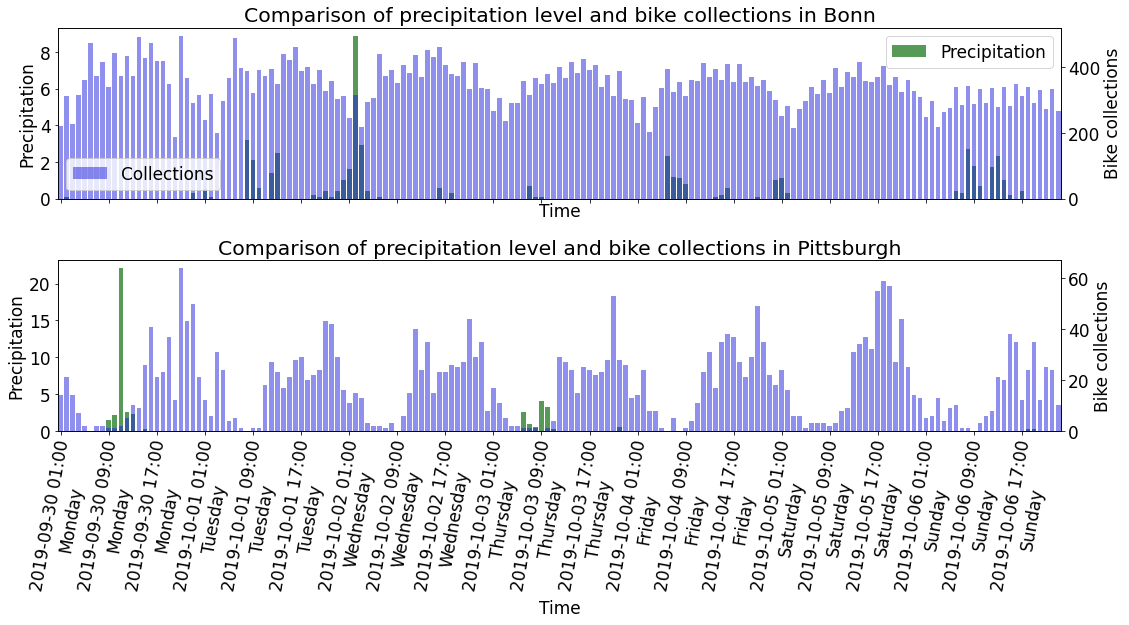

In [24]:
fig, ax = plt.subplots(2, 1, sharex=True)
ax_1 = sns.barplot(x='time', y='prcp', data=week_analysis, color="g", alpha=0.7, label='Precipitation', ax=ax[0])
ax[0].set_ylabel('Precipitation')
ax[0].set_xlabel('Time')
ax[0].set_title(f'Comparison of precipitation level and bike collections in {city}')
ax_2 = ax_1.twinx()
sns.barplot(x='time', y='collected', data=week_analysis, ax=ax_2, color='b', alpha=0.5, label='Collections')
ax_2.set_ylabel('Bike collections')
ax_2.set_xticks(np.arange(len(week_analysis), step=8))
ax_2.set_xticklabels(week_analysis['time'].dt.strftime('%Y-%m-%d %H:%M').tolist()[::8])
ax[0].legend(loc=1)
ax_2.legend(loc=3)
plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=80)

ax_3 = sns.barplot(x='time', y='prcp', data=week_analysis_2, color="g", alpha=0.7, label='Precipitation', ax=ax[1])
ax[1].set_ylabel('Precipitation')
ax[1].set_xlabel('Time')
ax_4 = ax_3.twinx()
sns.barplot(x='time', y='collected', data=week_analysis_2, ax=ax_4, color='b', alpha=0.5, label='Collections')
ax_4.set_ylabel('Bike collections')
ax_4.set_xticks(np.arange(len(week_analysis_2), step=8))
ax_4.set_xticklabels(
    (week_analysis_2['time'].dt.strftime('%Y-%m-%d %H:%M') + '\n' + week_analysis_2['time'].dt.day_name()).tolist()[::8])
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=80)

ax[1].set_title(f'Comparison of precipitation level and bike collections in {city2}')
fig.tight_layout()
plt.show()